<a href="https://colab.research.google.com/github/tingtingting118/PumpitUp/blob/main/pump_it_up_Ting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# for Q-Q plots
import scipy.stats as stats


#modeling


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest

# for feature engineering
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from sklearn.preprocessing import OneHotEncoder
from tempfile import mkdtemp
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder
from feature_engine.outliers import ArbitraryOutlierCapper
import scipy.stats as stats

import feature_engine.transformation as vt


from datetime import datetime as dt

In [ ]:
pip install feature_engine

     |████████████████████████████████| 180 kB 8.2 MB/s 
     |████████████████████████████████| 9.8 MB 36.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
url_x = 'https://raw.githubusercontent.com/tingtingting118/PumpitUp/main/Train_X.csv'
data_x = pd.read_csv(url_x)
url_y = 'https://raw.githubusercontent.com/tingtingting118/PumpitUp/main/Train_Y.csv'
data_y = pd.read_csv(url_y)
url_test_x = 'https://raw.githubusercontent.com/tingtingting118/PumpitUp/main/Testing_X.csv'
X_testing = pd.read_csv(url_test_x)
data_test = pd.read_csv(url_test_x)

In [ ]:
data = data_x.merge(data_y,how='inner',on='id')

##Data Exploration##

In [ ]:
#visualization
import plotly.graph_objects as go  #main graphic part
import plotly.express as px #easier graphs
from plotly.subplots import make_subplots # multiple graphs in 1 chart

#Make histograms : "status group", "amount_tsh", "population", "water_quality"
#feel free to change the columns you would like to explore

fig = make_subplots(rows = 2 , cols = 2, subplot_titles = ["status_group", "population", "construction", "Log(population + 1)"])


population = go.Histogram(x = data["population"], nbinsx = 20, name = "population")
constructions = go.Histogram(x = data["construction_year"], nbinsx = 20, name = "construction_year")
#log_pop = go.Histogram(x = data['log+1_population'], nbinsx = 20, name = "Log(population + 1)")
status_group = go.Histogram(x = data["status_group"], nbinsx = 20, name = "Status Group")
gps_height = go.Histogram(x = data["gps_height"], nbinsx = 20, name = "gps_height ")

fig.add_trace(status_group, 1, 1)
fig.add_trace(population , 1, 2)
fig.add_trace(gps_height, 2, 2)

fig.update_layout(showlegend = False)
fig.show()

In [ ]:
import plotly.express as px
#dataframe = data["population"]
df = px.data.tips()
fig = px.box(data[data["population"]!=0], y="population")
fig.show()

In [ ]:
fig  = go.Figure([go.Histogram(x= data[data['construction_year']!= 0]['status_group'], name = 'Status with construction_year'),
                  go.Histogram(x = data[data['construction_year']== 0]['status_group'], name = 'Status without construction_year')])

fig.update_layout(barmode = "group")
fig.update_layout(title ="Compare status with  and with the missing values for construction_year")
fig.show()
 # Contruction year, gps_height , population,longitude? is missing at random -- could use 99999 to impute missing 

In [ ]:
def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [ ]:
data['constructiony_99999'] = impute_na(data, 'construction_year', 99999)
data['constructiony_minus1'] = impute_na(data, 'construction_year', -1)
print('Original variable variance: ', data['construction_year'].var())
print('Variance after 99 imputation: ', data['constructiony_99999'].var())
print('Variance after -1 imputation: ', data['constructiony_minus1'].var())

NameError: ignored

In [ ]:
data["subvillage"].value_counts(dropna = False).plot(kind ="pie",figsize=(10,10))

In [ ]:
data['log+1_amounttsh'] = (data_x['amount_tsh']+1).transform(np.log)
data['log+1_population'] = (data_x['population']+1).transform(np.log)

(array([4.1659e+04, 1.4420e+03, 2.6660e+03, 3.3490e+03, 5.5440e+03,
        2.9290e+03, 1.5090e+03, 2.6100e+02, 2.5000e+01, 1.6000e+01]),
 array([ 0.        ,  1.27656913,  2.55313826,  3.82970739,  5.10627652,
         6.38284565,  7.65941477,  8.9359839 , 10.21255303, 11.48912216,
        12.76569129]),
 <a list of 10 Patch objects>)

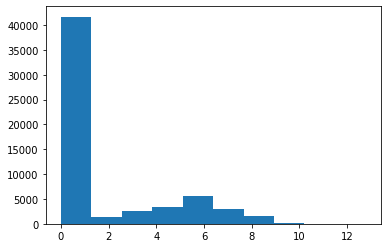

In [ ]:
plt.hist(data['log+1_amounttsh'])

In [ ]:
data_y.value_counts()

id     status_group           
74247  non functional             1
24713  functional                 1
24727  functional                 1
24726  functional                 1
24725  functional                 1
                                 ..
49474  functional needs repair    1
49473  functional                 1
49471  functional needs repair    1
49469  non functional             1
0      non functional             1
Length: 59400, dtype: int64

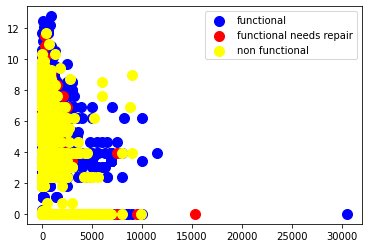

In [ ]:
#condition = (data["population"]!=0) & (data["amount_tsh"] !=0)
scatter_x = np.array(data["population"])
scatter_y = np.array(data["log+1_amounttsh"])
group = np.array(data["status_group"])
cdict = {"functional": 'blue', "non functional": 'yellow', "functional needs repair": 'red'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

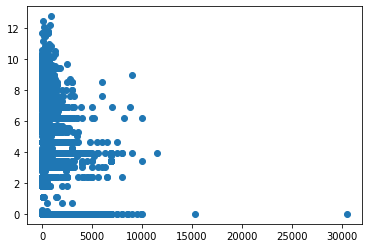

In [ ]:
scatter_x = np.array(data["population"])
scatter_y = np.array(data["log+1_amounttsh"])
#group = np.array(data["status_group"])
#cdict = {"functional": 'blue', "non functional": 'yellow', "functional needs repair": 'red'}

plt.scatter(scatter_x, scatter_y)
plt.show()


##Select columns to use##



In [ ]:
cols_to_drop = ["id",
              "extraction_type_group","permit","public_meeting",
                "extraction_type","lga","ward","num_private","subvillage","region_code",
                "source_class","source", "quality_group","waterpoint_type_group","wpt_name",
                "scheme_name","management","recorded_by","payment_type","quantity_group"
                ]
X_training = data_x.drop(columns = cols_to_drop)
cols_to_drop.remove("id")
X_testing.drop(columns = cols_to_drop, inplace = True)
X_training.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,population,scheme_management,construction_year,extraction_type_class,management_group,payment,water_quality,quantity,source_type,waterpoint_type
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,VWC,1999,gravity,user-group,pay annually,soft,enough,spring,communal standpipe
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,280,Other,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,250,VWC,2009,gravity,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,VWC,1986,submersible,user-group,never pay,soft,dry,borehole,communal standpipe multiple
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,0,NaN,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [ ]:
for var in X_training.columns:
  print(var, X_training[var].unique()[0:20],'\n')

amount_tsh [6000.    0.   25.   20.  200.  500.   50. 4000. 1500.    6.  250.   10.
 1000.  100.   30. 2000.  400. 1200.   40.  300.] 

date_recorded ['2011-03-14' '2013-03-06' '2013-02-25' '2013-01-28' '2011-07-13'
 '2011-03-13' '2012-10-01' '2012-10-09' '2012-11-03' '2011-08-03'
 '2011-02-20' '2013-02-18' '2012-10-14' '2013-03-15' '2012-10-20'
 '2011-08-04' '2011-07-04' '2011-09-04' '2011-07-22' '2011-02-22'] 

funder ['Roman' 'Grumeti' 'Lottery Club' 'Unicef' 'Action In A'
 'Mkinga Distric Coun' 'Dwsp' 'Rwssp' 'Wateraid' 'Isingiro Ho' 'Private'
 'Danida' 'World Vision' 'Lawatefuka Water Supply' 'Biore' 'Rudep'
 'Hesawa' 'Twe' 'Isf' 'African Development Bank'] 

gps_height [1390 1399  686  263    0   62 1062 1368 1645 1703 1656 1162 1763 2216
 1510  672 1273  200 1443 1256] 

installer ['Roman' 'GRUMETI' 'World vision' 'UNICEF' 'Artisan' 'DWE' 'DWSP'
 'Water Aid' 'Private' 'DANIDA' 'Lawatefuka water sup' 'WEDECO' 'Danid'
 'TWE' 'ISF' 'Kilolo Star' 'District council' 'Water' 'WU' nan]

In [ ]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in X_training.columns if X_training[var].dtype!='O' and X_training[var].nunique()<10]
continuous = [var for var in X_training.columns if X_training[var].dtype!='O' and X_training not in discrete]



# categorical
categorical = [var for var in X_training.columns if X_training[var].dtype=='O']

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))


There are 0 discrete variables
There are 7 continuous variables
There are 13 categorical variables


### Missing data imputation ###

In [ ]:
#numerical variables 
X_training[X_training ==0].select_dtypes(exclude = 'O').count()

amount_tsh           41639
gps_height           20438
longitude             1812
latitude                 0
district_code           23
population           21381
construction_year    20709
dtype: int64

In [ ]:
#categorical variables
X_training.select_dtypes(include = 'O').isnull().mean()

date_recorded            0.000000
funder                   0.061195
installer                0.061532
basin                    0.000000
region                   0.000000
scheme_management        0.065269
extraction_type_class    0.000000
management_group         0.000000
payment                  0.000000
water_quality            0.000000
quantity                 0.000000
source_type              0.000000
waterpoint_type          0.000000
dtype: float64

In [ ]:
#replace 0 construction year, gps_height with NaN for imputation later
X_training["construction_year"].replace(0,np.NaN,inplace = True)
X_training["gps_height"].replace(0,np.NaN,inplace = True)
X_training["population"].replace(0,np.NaN,inplace = True)

In [ ]:
X_testing["construction_year"].replace(0,np.NaN,inplace = True)
X_testing["gps_height"].replace(0,np.NaN,inplace = True)
X_testing["population"].replace(0,np.NaN,inplace = True)

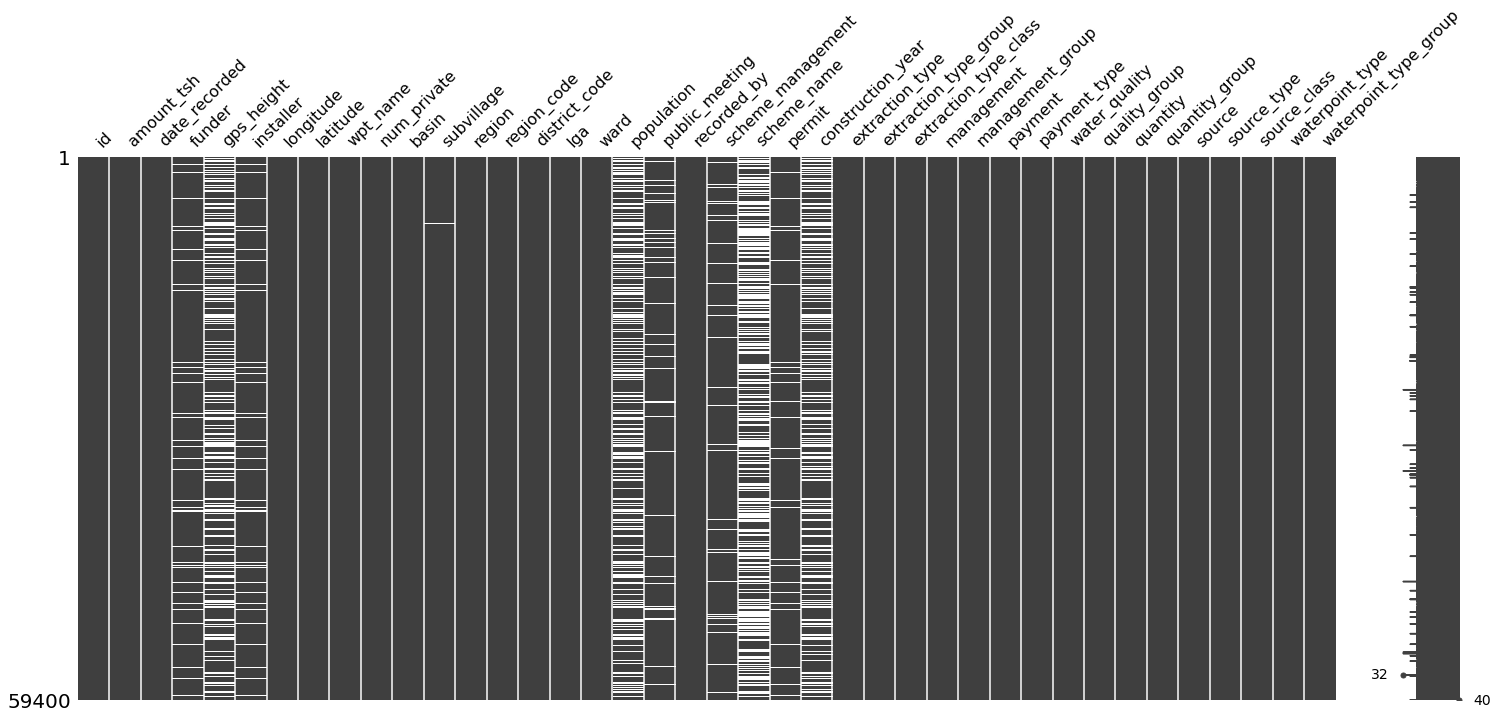

In [ ]:
#visualize all missing values


data_x["construction_year"].replace(0,np.NaN,inplace = True)
data_x["gps_height"].replace(0,np.NaN,inplace = True)
data_x["population"].replace(0,np.NaN,inplace = True)
msno.matrix(data_x)

In [ ]:
msno.dendrogram(X_training)

Imputation methods to perform:


*   Numerical --> with 0 , arbitrary value imputation
*   categorical --> add missing label imputation







##Add new features##


In [ ]:
X_training["date_recorded"] = pd.to_datetime(X_training["date_recorded"])

#add month column from recorded
X_training["date_recorded_month"] = pd.to_datetime(X_training["date_recorded"]).dt.month

#months since last recorded
X_training["duration_since_recorded"] = round((pd.datetime(2013,12,3) -X_training["date_recorded"])/ np.timedelta64(1, 'M'),0)  #convert into number of months

#Age from construction to recorded
X_training["construction_to_record"] = X_training["date_recorded"].dt.year - X_training["construction_year"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
X_testing["date_recorded"] = pd.to_datetime(X_testing["date_recorded"])

#add month column from recorded
X_testing["date_recorded_month"] = pd.to_datetime(X_testing["date_recorded"]).dt.month

#months since last recorded
X_testing["duration_since_recorded"] = round((pd.datetime(2013,12,3) -X_testing["date_recorded"])/ np.timedelta64(1, 'M'),0)  #convert into number of months

#Age from construction to recorded
X_testing["construction_to_record"] = X_testing["date_recorded"].dt.year - X_testing["construction_year"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
X_training.drop(columns = ["date_recorded","construction_year"],inplace = True)
X_testing.drop(columns = ["date_recorded","construction_year"],inplace = True)

In [ ]:
X_training.installer.str.lower().sort_values().tolist()

['-',
 '-',
 '-',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [ ]:
X_training.installer.str.lower().value_counts()

dwe           17405
government     1891
hesawa         1395
rwe            1206
commu          1065
              ...  
ox                1
hesawq            1
kdpa              1
samsoni           1
mkuluku           1
Name: installer, Length: 1935, dtype: int64

In [ ]:
X_training.installer.value_counts()

DWE                 17402
Government           1825
RWE                  1206
Commu                1060
DANIDA               1050
                    ...  
Tansi                   1
Nimrod Mkono[mb]        1
Jackson Makore          1
Mama Hamisa             1
NGO'S                   1
Name: installer, Length: 2145, dtype: int64

In [ ]:
X_training.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Rashid                       1
Rumaki                       1
Maliasili                    1
Mhoranzi                     1
Lgcgd                        1
Name: funder, Length: 1897, dtype: int64

In [ ]:
X_training.funder.str.lower().value_counts()

government of tanzania    9084
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
                          ... 
paulo sange                  1
tajiri jumbe lila            1
ccps                         1
mbeje                        1
mkuluku                      1
Name: funder, Length: 1897, dtype: int64

## Logarithm transformation on population

##Categorical encoding and rare labels##

##Longitude / Latitude ##

### Use distance feature ###

In [ ]:
lat1 = data_x["longitude"].mean()
log1 = data_x["latitude"].mean()
#print(lat1,log1)
lat2 = data_test["longitude"].mean()
log2 = data_test["latitude"].mean()

In [ ]:
X_training.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'district_code', 'population',
       'scheme_management', 'extraction_type_class', 'management_group',
       'payment', 'water_quality', 'quantity', 'source_type',
       'waterpoint_type', 'date_recorded_month', 'duration_since_recorded',
       'construction_to_record'],
      dtype='object')

In [ ]:
def haversine_dist(lat1,lng1,lat2,lng2):
  lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
  radius = 6371  # Earth's radius taken from google
  lat = lat2 - lat1
  lng = lng2 - lng1
  d = np.sin(lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng/2) ** 2
  h = 2 * radius * np.arcsin(np.sqrt(d))
  return h

In [ ]:
X_training["h_distance"] = haversine_dist(lat1,log1,X_training["latitude"],X_training["longitude"])
X_training.drop(columns =["latitude","longitude" ], inplace = True)

X_testing["h_distance"] = haversine_dist(lat2,log2,X_testing["latitude"],X_testing["longitude"])
X_testing.drop(columns =["latitude","longitude" ], inplace = True)



In [ ]:
X_training.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'district_code', 'population', 'scheme_management',
       'extraction_type_class', 'management_group', 'payment', 'water_quality',
       'quantity', 'source_type', 'waterpoint_type', 'date_recorded_month',
       'duration_since_recorded', 'construction_to_record', 'h_distance'],
      dtype='object')

###Use kmeans to group them###

In [ ]:
from sklearn.cluster import KMeans

def cluster(data, n):
  '''
  input: dataframe containing Latitude(x) and Longitude(y) coordinates
  output: series of cluster labels that each row of coordinates belongs to.
  '''
  model = KMeans(n_clusters=n)
  labels = model.fit_predict(data)
  return labels

In [ ]:
X_training["geo_label"] = cluster(data_x[['longitude','latitude']],3)
X_testing["geo_label"] = cluster(data_test[['longitude','latitude']],3)

In [ ]:
X_training.drop(columns = ['longitude','latitude'], inplace = True)
X_testing.drop(columns = ['longitude','latitude'], inplace = True)

*italicized text*### Reverse coding ###

In [ ]:
import reverse_geocoder as rg
def geocoder(data):
  '''
  input: dataframe containing Latitude(x) and Longitude(y) coordinates
  output: JSON data containing info on available building or street names.
  '''
  coordinates = tuple(data[['latitude','longitude']].values[3])
  #data[['latitude','longitude']].values
  results = rg.search(coordinates) # default mode = 2
  return results

In [ ]:
geocoder(data_x)

[{'lat': '-11.36667',
  'lon': '38.41667',
  'name': 'Masuguru',
  'admin1': 'Mtwara',
  'admin2': '',
  'cc': 'TZ'}]

##PCA Test

In [ ]:
from sklearn.decomposition import PCA
def pca(data):
  '''
  input: dataframe containing Latitude(x) and Longitude(y)
  '''
  coordinates = data[['latitude','longitude']].values
  pca_obj = PCA().fit(coordinates)
  pca_x = pca_obj.transform(data[['latitude','longitude']])[:,0]
  pca_y = pca_obj.transform(data[['latitude','longitude']])[:,1]
  return pca_x, pca_y

##Pipeline##

In [ ]:
data_y.drop(columns = ["id"], inplace = True)

In [ ]:
#this column need to be one-hot
X_training['district_code'] = X_training['district_code'].astype('O')


X_testing['district_code'] = X_testing['district_code'].astype('O')

In [ ]:
#lowercase funer and installer
X_training["installer"] = X_training["installer"].str.lower()
X_training["funder"] = X_training["funder"].str.lower()


X_testing["installer"] = X_testing["installer"].str.lower()
X_testing["funder"] = X_testing["funder"].str.lower()

## Pipeline1

In [ ]:
pipe = Pipeline([
 ('imputation_num', mdi.ArbitraryNumberImputer(arbitrary_number=9999,
                                variables=['construction_to_record', 'gps_height', 'population'])),
('imputer_cat',
     mdi.CategoricalImputer(variables=['funder', 'installer', 'scheme_management'])),
    
 ('encoder_rare_label1',
     ce.RareLabelEncoder(tol=0.05,
                                    n_categories=8,
                                    variables=["region"])),
   ('encoder_rare_label2',
     ce.RareLabelEncoder(tol=0.04,
                                    n_categories=8,
                                    variables=["scheme_management"])),
                 

    ('encoder_rare_label3',
     ce.RareLabelEncoder(tol=0.03,
                                    n_categories=8,
                                    variables=["funder"])),
    ('encoder_rare_label4',
     ce.RareLabelEncoder(tol=0.02,
                                    n_categories=8,
                                    variables=["installer"])) ,
  ('onehot_encoder',fe_OneHotEncoder(
    top_categories=None,
    variables=['funder','installer','basin', 'region','district_code' ,'scheme_management', 'extraction_type_class', 'management_group',
       'payment', 'water_quality','source_type','quantity',
       'waterpoint_type' ],  # we can select which variables to encode
    drop_last=True))
      ,
 
       ('rfmodel',RandomForestClassifier()
       )
 
 
 ])                
#score = 0.8013 from drivendata for this pipeline

In [ ]:
#pipe.fit(X_training,data_y.values.ravel())
pipe.fit(X_training,data_y.values.ravel())

Pipeline(steps=[('imputation_num',
                 ArbitraryNumberImputer(arbitrary_number=9999,
                                        variables=['construction_to_record',
                                                   'gps_height',
                                                   'population'])),
                ('imputer_cat',
                 CategoricalImputer(variables=['funder', 'installer',
                                               'scheme_management'])),
                ('encoder_rare_label1',
                 RareLabelEncoder(n_categories=8, variables=['region'])),
                ('encoder_rare_label2',
                 RareLabelEncoder...
                 RareLabelEncoder(n_categories=8, tol=0.02,
                                  variables=['installer'])),
                ('onehot_encoder',
                 OneHotEncoder(drop_last=True,
                               variables=['funder', 'installer', 'basin',
                                          'region',

In [ ]:
cross_val_score(pipe, X_training,data_y.values.ravel(), cv=5).mean()

0.8028549592210629

In [ ]:
rfc_y_predict = pipe.predict(X_testing.drop(columns = ["id"]))

In [ ]:
rfc_submission = pd.DataFrame({"id":X_testing["id"], "status_group":rfc_y_predict})
rfc_submission.to_csv("c:/users/karen/Downloads/rf_submission_1201.csv",index= False)#

## Pipeline 2 ##

In [ ]:
pipe2 = Pipeline([
 ('imputation_num', mdi.ArbitraryNumberImputer(arbitrary_number=9999,
                                variables=['construction_to_record', 'gps_height', 'population'])),
('imputer_cat', # using most frequent value to impute
     mdi.CategoricalImputer(imputation_method='frequent',variables=['funder', 'installer', 'scheme_management'])),
('logarithm_transform', vt.LogCpTransformer(variables = ['population','amount_tsh'],C="auto")),

 ('encoder_rare_label1',
     ce.RareLabelEncoder(tol=0.05,
                                    n_categories=8,
                                    variables=["region"])),
   ('encoder_rare_label2',
     ce.RareLabelEncoder(tol=0.04,
                                    n_categories=8,
                                    variables=["scheme_management"])),
                 

    ('encoder_rare_label3',
     ce.RareLabelEncoder(tol=0.03,
                                    n_categories=8,
                                    variables=["funder"])),
    ('encoder_rare_label4',
     ce.RareLabelEncoder(tol=0.02,
                                    n_categories=8,
                                    variables=["installer"])) ,
  ('onehot_encoder',fe_OneHotEncoder(
    top_categories=None,
    variables=['funder','installer','basin', 'region','district_code' ,'scheme_management', 'extraction_type_class', 'management_group',
       'payment', 'water_quality','source_type','quantity',
       'waterpoint_type' ],  # we can select which variables to encode
    drop_last=True))
      ,
 
       ('rfmodel',RandomForestClassifier()
       )
 
 
 ])            

In [ ]:
pipe2.fit(X_training,data_y.values.ravel())

Pipeline(steps=[('imputation_num',
                 ArbitraryNumberImputer(arbitrary_number=9999,
                                        variables=['construction_to_record',
                                                   'gps_height',
                                                   'population'])),
                ('imputer_cat',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['funder', 'installer',
                                               'scheme_management'])),
                ('logarithm_transform',
                 LogCpTransformer(variables=['population', 'amount_tsh'])),
                ('encode...
                 RareLabelEncoder(n_categories=8, tol=0.02,
                                  variables=['installer'])),
                ('onehot_encoder',
                 OneHotEncoder(drop_last=True,
                               variables=['funder', 'installer', 'basin',
                                

In [ ]:
cross_val_score(pipe2, X_training,data_y.values.ravel(), cv=5).mean()

0.8013919746411255

In [ ]:
cross_val_score(pipe2, X_training,data_y.values.ravel(), cv=5).mean()

0.8037878787878787

In [ ]:
cross_val_score(pipe2, X_training,data_y.values.ravel(), cv=5).mean()

0.8039562289562291

In [ ]:
rfc_y_predict2 = pipe2.predict(X_testing.drop(columns = ["id"]))

In [ ]:
rfc_submission2 = pd.DataFrame({"id":X_testing["id"], "status_group":rfc_y_predict2})
rfc_submission2.to_csv("rf_submission_1211.csv",index= False)#

## Pipeline3

## Pipeline4  - logarithm transformation on Population , amount_tsh

In [ ]:
pipe4 = Pipeline([
 ('imputation_num', mdi.ArbitraryNumberImputer(arbitrary_number=9999,
                                variables=['construction_to_record', 'gps_height', 'population'])),
('imputer_cat',
     mdi.CategoricalImputer(variables=['funder', 'installer', 'scheme_management'])),

('logarithm_transform', vt.LogCpTransformer(variables = ['population','amount_tsh'],C="auto")),


    
 ('encoder_rare_label1',
     ce.RareLabelEncoder(tol=0.05,
                                    n_categories=8,
                                    variables=["region"])),
   ('encoder_rare_label2',
     ce.RareLabelEncoder(tol=0.04,
                                    n_categories=8,
                                    variables=["scheme_management"])),
                 

    ('encoder_rare_label3',
     ce.RareLabelEncoder(tol=0.03,
                                    n_categories=8,
                                    variables=["funder"])),
    ('encoder_rare_label4',
     ce.RareLabelEncoder(tol=0.02,
                                    n_categories=8,
                                    variables=["installer"])) ,
  ('onehot_encoder',fe_OneHotEncoder(
    top_categories=None,
    variables=['funder','installer','basin', 'region','district_code' ,'scheme_management', 'extraction_type_class', 'management_group',
       'payment', 'water_quality','source_type','quantity',
       'waterpoint_type' ],  # we can select which variables to encode
    drop_last=True))
      ,
 
       ('rfmodel',RandomForestClassifier()
       )
 
 
 ])                


In [ ]:
pipe4.fit(X_training,data_y.values.ravel())

Pipeline(steps=[('imputation_num',
                 ArbitraryNumberImputer(arbitrary_number=9999,
                                        variables=['construction_to_record',
                                                   'gps_height',
                                                   'population'])),
                ('imputer_cat',
                 CategoricalImputer(variables=['funder', 'installer',
                                               'scheme_management'])),
                ('logarithm_transform',
                 LogCpTransformer(variables=['population', 'amount_tsh'])),
                ('encoder_rare_label1',
                 RareLabelEncod...
                 RareLabelEncoder(n_categories=8, tol=0.02,
                                  variables=['installer'])),
                ('onehot_encoder',
                 OneHotEncoder(drop_last=True,
                               variables=['funder', 'installer', 'basin',
                                          'region',

In [ ]:
cross_val_score(pipe4, X_training,data_y.values.ravel(), cv=5).mean()

0.8043434343434346

In [ ]:
rfc_y_predict4 = pipe4.predict(X_testing.drop(columns = ["id"]))
rfc_submission4 = pd.DataFrame({"id":X_testing["id"], "status_group":rfc_y_predict4})
rfc_submission4.to_csv("c:/users/karen/Downloads/rf_submission_1204.csv",index= False)#

In [ ]:
print(cross_val_score(pipe4, X_training,data_y.values.ravel(), cv=5,scoring="precision_macro").mean(),
cross_val_score(pipe4, X_training,data_y.values.ravel(), cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe4, X_training,data_y.values.ravel(), cv=5,scoring="f1_macro").mean(),
#cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5,scoring="roc_auc").mean(),
cross_val_score(pipe4, X_training,data_y.values.ravel(), cv=5,scoring="recall_macro").mean()

)

0.7202005006479884 0.7976610564207471 0.6890920443554747 0.6716671529931004


## Pipeline 5 ## 

In [ ]:
pipe5 = Pipeline([
 ('imputation_num', mdi.ArbitraryNumberImputer(arbitrary_number=9999,
                                variables=['construction_to_record', 'gps_height', 'population'])),
('imputer_cat',
     mdi.CategoricalImputer(variables=['funder', 'installer', 'scheme_management'])),

('logarithm_transform', vt.LogCpTransformer(variables = ['population','amount_tsh'],C="auto")),


    
 ('encoder_rare_label1',
     ce.RareLabelEncoder(tol=0.05,
                                    n_categories=8,
                                    variables=["region","district_code"])),
   ('encoder_rare_label2',
     ce.RareLabelEncoder(tol=0.04,
                                    n_categories=8,
                                    variables=["scheme_management"])),
                 

    ('encoder_rare_label3',
     ce.RareLabelEncoder(tol=0.03,
                                    n_categories=8,
                                    variables=["funder"])),
    ('encoder_rare_label4',
     ce.RareLabelEncoder(tol=0.02,
                                    n_categories=8,
                                    variables=["installer"])) ,
  ('onehot_encoder',fe_OneHotEncoder(
    top_categories=None,
    variables=['funder','installer','basin', 'region','district_code' ,'scheme_management', 'extraction_type_class', 'management_group',
       'payment', 'water_quality','source_type','quantity',
       'waterpoint_type' ],  # we can select which variables to encode
    drop_last=True))
      ,
 
       ('rfmodel',RandomForestClassifier()
       )
 
 
 ])  

In [ ]:
pipe5.fit(X_training,data_y.values.ravel())
cross_val_score(pipe5, X_training,data_y.values.ravel(), cv=5).mean()

0.8037037037037036

In [ ]:
print(cross_val_score(pipe5, X_training,data_y.values.ravel(), cv=5,scoring="precision_macro").mean(),
cross_val_score(pipe5, X_training,data_y.values.ravel(), cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe5, X_training,data_y.values.ravel(), cv=5,scoring="f1_macro").mean(),
#cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5,scoring="roc_auc").mean(),
cross_val_score(pipe5, X_training,data_y.values.ravel(), cv=5,scoring="recall_macro").mean()

)

0.7204741154989296 0.8003489992365616 0.6894560708138069 0.6720045231800571


##Feature importance##

In [ ]:
p = Pipeline([
 ('imputation_num', mdi.ArbitraryNumberImputer(arbitrary_number=9999,
                                variables=['construction_to_record', 'gps_height', 'population'])),
('imputer_cat',
     mdi.CategoricalImputer(variables=['funder', 'installer', 'scheme_management'])),

('logarithm_transform', vt.LogCpTransformer(variables = ['population','amount_tsh'],C="auto")),


    
 ('encoder_rare_label1',
     ce.RareLabelEncoder(tol=0.05,
                                    n_categories=8,
                                    variables=["region"])),
   ('encoder_rare_label2',
     ce.RareLabelEncoder(tol=0.04,
                                    n_categories=8,
                                    variables=["scheme_management"])),
                 

    ('encoder_rare_label3',
     ce.RareLabelEncoder(tol=0.03,
                                    n_categories=8,
                                    variables=["funder"])),
    ('encoder_rare_label4',
     ce.RareLabelEncoder(tol=0.02,
                                    n_categories=8,
                                    variables=["installer"])) ,
  ('onehot_encoder',fe_OneHotEncoder(
    top_categories=None,
    variables=['funder','installer','basin', 'region','district_code' ,'scheme_management', 'extraction_type_class', 'management_group',
       'payment', 'water_quality','source_type','quantity',
       'waterpoint_type' ],  # we can select which variables to encode
    drop_last=True))
   
 ])                


x = p.fit_transform(X_training, data_y.values.ravel())

<AxesSubplot:>

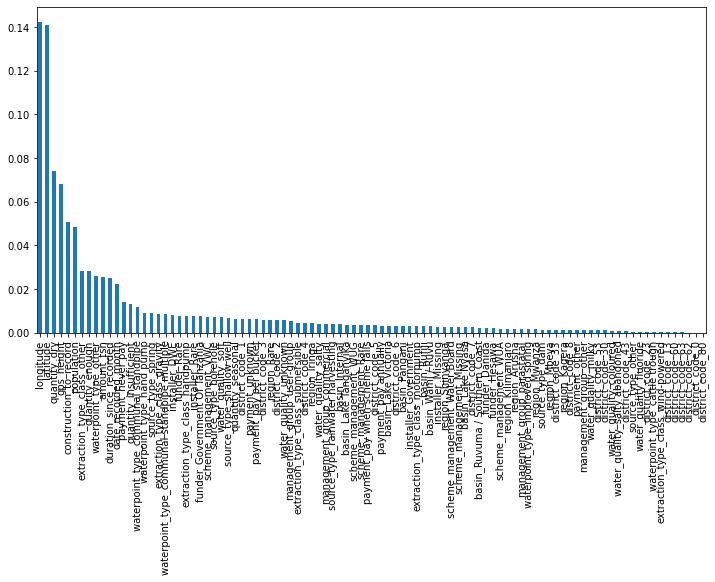

In [ ]:
#feature importance
importance = pd.Series(pipe4.named_steps['rfmodel'].feature_importances_)
importance.index = x.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

## Visualization ##

In [ ]:
tranformation =  Pipeline([
 ('imputation_num', mdi.ArbitraryNumberImputer(arbitrary_number=9999,
                                variables=['construction_to_record', 'gps_height', 'population'])),
('imputer_cat',
     mdi.CategoricalImputer(variables=['funder', 'installer', 'scheme_management'])),

('logarithm_transform', vt.LogCpTransformer(variables = ['population','amount_tsh'],C="auto")),


    
 ('encoder_rare_label1',
     ce.RareLabelEncoder(tol=0.05,
                                    n_categories=8,
                                    variables=["region"])),
   ('encoder_rare_label2',
     ce.RareLabelEncoder(tol=0.04,
                                    n_categories=8,
                                    variables=["scheme_management"])),
                 

    ('encoder_rare_label3',
     ce.RareLabelEncoder(tol=0.03,
                                    n_categories=8,
                                    variables=["funder"])),
    ('encoder_rare_label4',
     ce.RareLabelEncoder(tol=0.02,
                                    n_categories=8,
                                    variables=["installer"])) ,
  ('onehot_encoder',fe_OneHotEncoder(
    top_categories=None,
    variables=['funder','installer','basin', 'region','district_code' ,'scheme_management', 'extraction_type_class', 'management_group',
       'payment', 'water_quality','source_type','quantity',
       'waterpoint_type' ],  # we can select which variables to encode
    drop_last=True))

 
 ])  

In [ ]:
x_train = tranformation.fit_transform(X_training,data_y.values.ravel())

In [ ]:
xgboost.fit(x_train,data_y.values.ravel())
cross_val_score(xgboost, x_train,data_y.values.ravel(), cv=5).mean()

C:\Users\karen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
mapping = {"functional":1, "non functional":2, "functional needs repair":3}
data_y_adj = np.vectorize(mapping.get)(data_y.values.ravel())


In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [ ]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [ ]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [ ]:

#via = dtreeviz(xgboost, x_train, data_y_adj, target_name = "status_group", feature_names =  list(x_train.columns), 
               class_names =['functional','non functional','functional needs repair'], tree_index = 0 )

#via.view()

## Test 

In [ ]:
#use api of map to fill in the missing subvillage
import reverse_geocoder as rg
def geocoder(data):
  '''
  input: dataframe containing Latitude(x) and Longitude(y) coordinates
  output: JSON data containing info on available building or street names.
  '''
  coordinates = [tuple([x,y]) for x, y in data[['latitude','longitude']].values]
  
  #data[['latitude','longitude']].values
  results = rg.search(coordinates) # default mode = 2
  return results

In [ ]:
data_x_2 = data_x.copy()
data_x_2.loc[data_x_2["subvillage"].isnull(),"subvillage"] = [x["name"] for x in geocoder(data_x_2[data_x_2.subvillage.isnull()][['latitude','longitude']])]

Loading formatted geocoded file...


In [ ]:
data_test_2 = data_test.copy()
data_test_2.loc[data_test_2["subvillage"].isnull(),"subvillage"] = [x["name"] for x in geocoder(data_test_2[data_test_2.subvillage.isnull()][['latitude','longitude']])]

In [ ]:
cols_to_drop = ["id",
              "extraction_type_group","permit","public_meeting",
                "extraction_type","lga","ward","num_private","region_code",
                "source_class","source", "quality_group","waterpoint_type_group","wpt_name",
                "scheme_name","management","recorded_by","payment_type","quantity_group"
                ]
X_train = data_x_2.drop(columns = cols_to_drop)
cols_to_drop.remove("id")
X_test = data_test_2.copy()
X_test.drop(columns = cols_to_drop, inplace = True)
X_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,population,scheme_management,construction_year,extraction_type_class,management_group,payment,water_quality,quantity,source_type,waterpoint_type
0,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,5,109.0,VWC,1999.0,gravity,user-group,pay annually,soft,enough,spring,communal standpipe
1,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,2,280.0,Other,2010.0,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,4,250.0,VWC,2009.0,gravity,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple
3,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,58.0,VWC,1986.0,submersible,user-group,never pay,soft,dry,borehole,communal standpipe multiple
4,0.0,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,1,NaN,NaN,NaN,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [ ]:
#replace 0 construction year, gps_height with NaN for imputation later
X_train["construction_year"].replace(0,np.NaN,inplace = True)
X_train["gps_height"].replace(0,np.NaN,inplace = True
X_train["population"].replace(0,np.NaN,inplace = True)


X_test["construction_year"].replace(0,np.NaN,inplace = True)
X_test["gps_height"].replace(0,np.NaN,inplace = True)
X_test["population"].replace(0,np.NaN,inplace = True)

In [ ]:
X_train["date_recorded"] = pd.to_datetime(X_train["date_recorded"])

#add month column from recorded
X_train["date_recorded_dayofweek"] = pd.to_datetime(X_train["date_recorded"]).dt.dayofweek

#months since last recorded
X_train["duration_since_recorded"] = round((pd.datetime(2013,12,3) -X_train["date_recorded"])/ np.timedelta64(1, 'M'),0)  #convert into number of months

#Age from construction to recorded
X_train["construction_to_record"] = X_train["date_recorded"].dt.year - X_train["construction_year"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
X_test["date_recorded"] = pd.to_datetime(X_test["date_recorded"])

#add month column from recorded
X_test["date_recorded_dayofweek"] = pd.to_datetime(X_test["date_recorded"]).dt.dayofweek

#months since last recorded
X_test["duration_since_recorded"] = round((pd.datetime(2013,12,3) -X_test["date_recorded"])/ np.timedelta64(1, 'M'),0)  #convert into number of months

#Age from construction to recorded
X_test["construction_to_record"] = X_test["date_recorded"].dt.year - X_test["construction_year"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
X_train.drop(columns = ["date_recorded","construction_year"],inplace = True)
X_test.drop(columns = ["date_recorded","construction_year"],inplace = True)

In [ ]:
def find_non_rare_labels(df, feature, tolerence):
  #temp = df.groupby([feature])[feature].count() / len(data_new)
  temp = df[feature].value_counts(normalize = True)
  non_rare = [x for x in temp.loc[temp >tolerence].index.values]
  print("non rare group for feature is: {}  ".format(non_rare))
  return (non_rare)

In [ ]:
find_non_rare_labels(X_train, "district_code", 0.05)

non rare group for feature is: [1, 2, 3, 4, 5, 6, 7]  


[1, 2, 3, 4, 5, 6, 7]

In [ ]:
#this column need to be one-hot
X_train['district_code'] = X_train['district_code'].astype('O')


X_test['district_code'] = X_test['district_code'].astype('O')

In [ ]:
#lowercase funer and installer
X_train["installer"] = X_train["installer"].str.lower()
X_train["funder"] = X_train["funder"].str.lower()


X_test["installer"] = X_test["installer"].str.lower()
X_test["funder"] = X_test["funder"].str.lower()

In [ ]:
pipe_test = Pipeline([
 ('imputation_num', mdi.ArbitraryNumberImputer(arbitrary_number=9999,
                                variables=['construction_to_record', 'gps_height', 'population'])),
('imputer_cat',
     mdi.CategoricalImputer(variables=['funder', 'installer', 'scheme_management'])),

('logarithm_transform', vt.LogCpTransformer(variables = ['population','amount_tsh'],C="auto")),


    
 ('encoder_rare_label1',
     ce.RareLabelEncoder(tol=0.005,
                                    n_categories=8,
                                    variables=["subvillage"])),
   ('encoder_rare_label2',
     ce.RareLabelEncoder(tol=0.04,
                                    n_categories=8,
                                    variables=["scheme_management"])),
                 

    ('encoder_rare_label3',
     ce.RareLabelEncoder(tol=0.03,
                                    n_categories=8,
                                    variables=["funder"])),
    ('encoder_rare_label4',
     ce.RareLabelEncoder(tol=0.02,
                                    n_categories=8,
                                    variables=["installer"])) ,
     ('encoder_rare_label5',
     ce.RareLabelEncoder(tol=0.05,
                                    n_categories=8,
                                    variables=["region"])),
  ('onehot_encoder',fe_OneHotEncoder(
    top_categories=None,
    variables=['funder','installer','basin' ,'scheme_management', 'extraction_type_class', 'management_group',
       'payment', 'water_quality','source_type','quantity',"subvillage","region","district_code",
       'waterpoint_type' ],  # we can select which variables to encode
    drop_last=True))
      ,
 
       ('rfmodel',RandomForestClassifier()
       )
 
 
 ])                


In [ ]:
pipe_test.fit(X_train,data_y.values.ravel() )

cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5).mean()

0.8052020202020203

In [ ]:
pipe_test.fit(X_train,data_y.values.ravel() )

cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5).mean()

0.8049663299663299

In [ ]:
rfc_y_predict_test = pipe_test.predict(X_test.drop(columns = ["id"]))
rfc_submission_test = pd.DataFrame({"id":X_test["id"], "status_group":rfc_y_predict_test})
rfc_submission_test.to_csv("rf_submission_1211.csv",index= False)#

In [ ]:
print(cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5,scoring="precision_macro").mean(),
cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5,scoring="f1_macro").mean(),
#cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5,scoring="roc_auc").mean(),
cross_val_score(pipe_test, X_train,data_y.values.ravel(), cv=5,scoring="recall_macro").mean()

)

0.7215317465475672 0.8010682259337412 0.6920390272164223 0.6733160575737458
